In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Continous models

 - Euler's model
 - Heun's method

### SIR models

When writing your own model, there can be a mistake in your modelling logic or integrators. Here's a few tipcs for for debuging integrators:
  
  - Use `N` as known solution. By decoupling SIR equations, we can make sure that we don't 'leak' people in a closed population. Be suspicious of your integration step.

In [ ]:
def run_continuous_SIR(steps, N, beta, alpha, h):


  res = [] #list of results
  S = N-1; I = 1; R = 0 #set initial conditions
  T = np.arange(1,steps/h);
  for t in T:
    # Get the speed in all dimensions
    dSdt = -S * beta*I #rate of new infections
    dIdt = S*beta*I - alpha*I
    dRdt = alpha*I #expected number of new recoveries

    # Project those speeds speed
    S+= dSdt*h #S(t+1)
    I+= dIdt*h #I(t+1)
    R+= dRdt*h #R(t+1)
    res.append((S,I,R))

  #zip unpacked list of tuples (n-th elements all together)
  #map them to arrays
  St,It,Rt = map(np.array, zip(*res))

  return(St,It,Rt)

In [ ]:
#fake data for weekly tests
positive_tests = [0,4,0,12,27,82,107,125,277,588,632,750,1251,1300,2012,1775,1901,1413,750,381,120,64,27,55,33,41,19]

#parameters
N = 10000 #population
beta = 1/30*5*1/N #transmission time per contact: 30 days. contacts per day: 5
alpha = 1/15 #recovery period: 15 days
tmax = 182 #integration time (days)
h = 1.0 #integration step

(St,It,Rt) = run_continuous_SIR(tmax, N, beta, alpha, h)

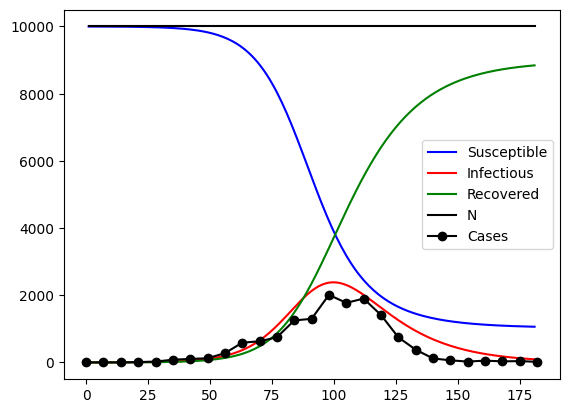

In [ ]:
#plot results
fig,ax = plt.subplots()
ax.plot(h*np.arange(1,tmax/h), St, 'b', label='Susceptible')
ax.plot(h*np.arange(1,tmax/h),It, 'r', label='Infectious')
ax.plot(h*np.arange(1,tmax/h),Rt, 'g', label='Recovered')
ax.plot(h*np.arange(1,tmax/h),St+It+Rt, 'k', label='N')
ax.plot(7*np.arange(0,len(positive_tests)), positive_tests, 'k', marker ='o',  label='Cases')
ax.legend();

How would you turn this method into `Heun's method`? Maybe try to distinguish the steps of where Euler would go. First, check the next step as usual (e.g. `S_e += dSdt*h`), then observe where Euler would be (e.g. using previous value, take the derivative `dSdt_e = -S_e * beta*I_e`). Some average that as we saw in class.

### Example of adaptive Heun's method (pseudo algorithm)


[Naive adaptive step method](https://math.libretexts.org/Bookshelves/Differential_Equations/Numerically_Solving_Ordinary_Differential_Equations_(Brorson)/01%3A_Chapters/1.05%3A_Adaptive_stepping)


**Inputs:**  
- Initial condition: 𝑦₀ = [𝑢₀, 𝑣₀]ᵀ  
- End time: 𝑡ₑₙd

---

**Initialize:**  
- 𝑡₀ = 0, 𝑦₀, ℎ  
- 𝑡ₒₗ₁ = 1e−2, 𝑡ₒₗ₂ = 2e−4

---

**Loop:**  
For 𝑛 = 0 to 𝑡ₑₙd / ℎ:

1. **Compute initial slope:**  
   𝑠₁ = 𝑓(𝑡ₙ, 𝑦ₙ)
   
2. **Take forward Euler step:**  
   𝑦ₓₑ = 𝑦ₙ + ℎ * 𝑠₁
   
3. **Get slope at new position:**  
   𝑠₂ = 𝑓(𝑡ₙ, 𝑦ₓₑ)
   
4. **Take Heun step:**  
   𝑦ₕ = 𝑦ₙ + ℎ * (𝑠₁ + 𝑠₂) / 2

5. **Check error between Euler and Heun steps:**  
   𝛿 = ||𝑦ₓₑ − 𝑦ₕ||

6. **Adjust step size:**  
   - If 𝛿 > 𝑡ₒₗ₁, decrease step: ℎ = ℎ / 2  
   - Else if 𝛿 < 𝑡ₒₗ₂, increase step: ℎ = 2ℎ  
   - Otherwise, keep current step size.

---

**End loop.**  
**Return:** 𝑦ₙ



### Bonus: SIS model

In [ ]:
def run_continuous_SIS(steps, N, beta, alpha, h):

  #discrete steps of Euler's methods
  res = [] #list of results
  S = N-1; I = 1; #set initial conditions
  T = np.arange(1,steps/h);
  for t in T:
    delta_S = -S * beta*I + alpha*I #rate of new infections
    S += delta_S*h #S(t+1)
    I+= -delta_S*h #I(t+1)
    res.append((S,I))

  #zip unpacked list of tuples (n-th elements all together)
  #map them to arrays
  St,It = map(np.array, zip(*res))

  return(St,It)

In [ ]:
#fake data for weekly tests
positive_tests = [0,4,0,12,27,82,107,125,277,588,632,750,1251,1300,2012,1775,1901,1413,750,381,120,64,27,55,33,41,19]

#parameters
N = 10000 #population
beta = 1/30*5*1/N #transmission time per contact: 30 days. contacts per day: 5
alpha = 1/15 #recovery period: 15 days
# alpha = 1/5 #recovery period: 5 days
tmax = 182 #integration time (days)
h = 1.0 #integration step

(St,It) = run_continuous_SIS(tmax, N, beta, alpha, h)

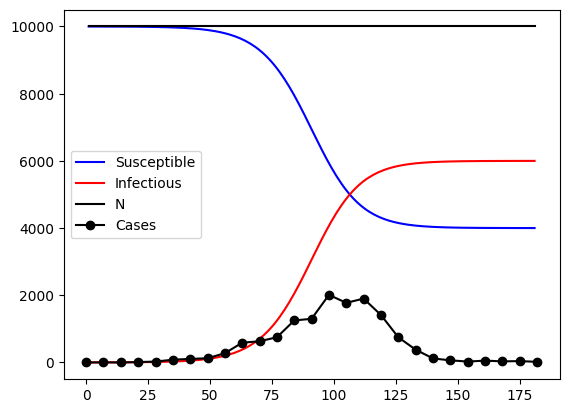

In [ ]:
#plot results
fig,ax = plt.subplots()
ax.plot(h*np.arange(1,tmax/h), St, 'b', label='Susceptible')
ax.plot(h*np.arange(1,tmax/h),It, 'r', label='Infectious')
ax.plot(h*np.arange(1,tmax/h),St+It, 'k', label='N')
ax.plot(7*np.arange(0,len(positive_tests)), positive_tests, 'k', marker ='o',  label='Cases')
ax.legend();

In class, we said that the epidemic should'nt spread when we have

$$\frac{\beta N}{\alpha} < 1$$

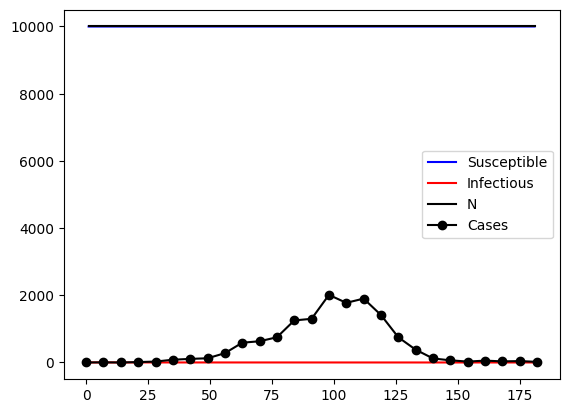

In [ ]:
#plot results
fig,ax = plt.subplots()
ax.plot(h*np.arange(1,tmax/h), St, 'b', label='Susceptible')
ax.plot(h*np.arange(1,tmax/h),It, 'r', label='Infectious')
ax.plot(h*np.arange(1,tmax/h),St+It, 'k', label='N')
ax.plot(7*np.arange(0,len(positive_tests)), positive_tests, 'k', marker ='o',  label='Cases')
ax.legend();

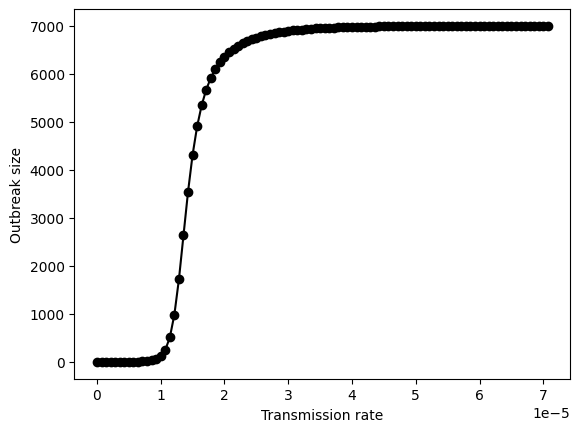

In [ ]:
#@title Statistical analysis of the SIR or SIS model { run: "auto" }

import matplotlib.pyplot as plt
from scipy import ndimage
from matplotlib import cm

from IPython import display
from time import sleep

# Parameters
N = 7000 #@param {type:"slider", min:1000, max:100000, step:1000}
tmax = 200 #@param {type:"slider", min:100, max:10000, step:100}
# probabilities
alpha = 0.05 #@param {type:"slider", min:0, max:1, step:0.001}

#run model
beta_values = np.arange(0,0.5/N,0.005/N)
outbreak_sizes = np.empty(0)
for beta in beta_values:
  #(St,It) = run_continuous_SIS(tmax, N, beta, alpha, h)
  #outbreak_sizes = np.append(outbreak_sizes, It[-1])

  (St,It,Rt) = run_continuous_SIR(tmax, N, beta, alpha, h)
  outbreak_sizes = np.append(outbreak_sizes, Rt[-1])

#plot
plt.plot(beta_values, outbreak_sizes, marker ='o', color='k')
plt.xlabel("Transmission rate")
plt.ylabel("Outbreak size")
plt.show()

Note that $N$ doesn't matter. In discrete model, we run until no more infectious individuals. This is not the case here. `I` gets smaller and smaller. You need to integrate for longer (increase `t_max`)

## Lotka-Volterra

In [ ]:
#parameters
alpha = 0.005 #predation rate (shark reproduction)
nu_s = 0.02 #shark death rate
mu_f = 0.05 #fish reproduction rate
c = 1/10 #conversion factor (shark to fish ratio)
epsilon = 0.1
F0 = 0.01 #initial number of fish
S0 = 20  #initial number of sharks

In [ ]:
#discrete steps of Euler's methods
res = [] #list of results
F = F0; S = S0; #set initial conditions
h = 0.01; #timestep
T = np.arange(1,1500/h);
for t in T:
  delta_F = mu_f*F - F*S*alpha #expected number of new misinformed
  delta_S = c*F*S*alpha - nu_s*S #expected number of new corrections
  F += delta_F*h #F(t+1)
  S += delta_S*h #S(t+1)
  res.append((F,S))

#zip unpacked list of tuples (n-th elements all together)
#map them to arrays
Fd,Sd = map(np.array, zip(*res))

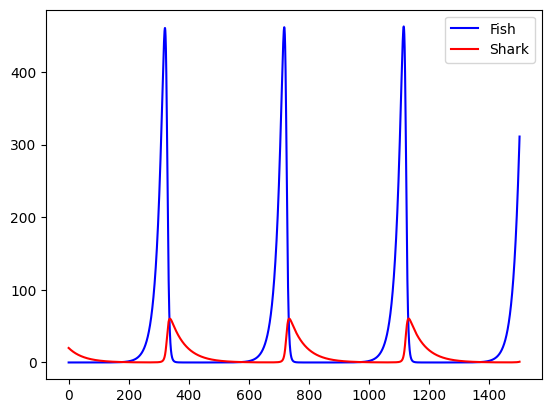

In [ ]:
#plot results
fig,ax = plt.subplots()
ax.plot(h*T,Fd, 'b', label='Fish')
ax.plot(h*T,Sd, 'r', label='Shark')
ax.legend();